In [1]:
!pip install umap
!pip install umap-learn

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=3d0d3fd03ab0951acc2ba96b02465f3b62f290107780c0b5aa6ee720a0a094fa
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=bef3a232588aecf84923394d8bdcbc4a6d50caf49d0459dd4b1ef3ffd938da5a
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subpro

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import umap.umap_ as umap
import sklearn
import numpy as np
# Read the data from the CSV file
data = pd.read_csv("train_no_simplify.csv")

In [10]:
print("data columns:", data.columns)
print("data length:",len(data))
print("\noriginal_text : \n\n{} \n cleaned_text: \n \n {} ".format(data['text'][0],data['clean_text'][0]))

data columns: Index(['text', 'category', 'clean_text'], dtype='object')
data length: 11314

original_text : 

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




 
 cleaned_text: 
 
 subject car nntppostinghost organization university maryland college park lines wondering anyone enlighten car saw day door sports car looked late e

In [11]:
# Create a TF-IDF matrix
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(data["clean_text"].astype(str).tolist())


In [12]:

# Perform SVD with 20 topics
svd = TruncatedSVD(n_components=20)
lsa_matrix = svd.fit_transform(tf_idf_matrix)

# Print the topics
print(vectorizer.vocabulary_)
print(lsa_matrix.shape)


{'subject': 74775, 'car': 10019, 'nntppostinghost': 54900, 'organization': 57341, 'university': 80800, 'maryland': 41055, 'college': 12662, 'park': 58560, 'lines': 38613, 'wondering': 85088, 'anyone': 3174, 'enlighten': 21019, 'saw': 68757, 'day': 15634, 'door': 18636, 'sports': 73298, 'looked': 39145, 'late': 37475, 'early': 19673, 'called': 9665, 'bricklin': 8563, 'doors': 18638, 'really': 64864, 'small': 71968, 'addition': 746, 'front': 25224, 'bumper': 9092, 'separate': 70056, 'rest': 66429, 'body': 7820, 'know': 36541, 'tellme': 76858, 'model': 47870, 'name': 53552, 'engine': 20956, 'specs': 73012, 'years': 87026, 'production': 62332, 'made': 40039, 'history': 30152, 'whatever': 84224, 'info': 32748, 'funky': 25555, 'looking': 39150, 'please': 60647, 'email': 20549, 'thanks': 77253, 'il': 31818, 'brought': 8751, 'neighborhood': 54048, 'lerxst': 38072, 'si': 71080, 'clock': 12281, 'poll': 60986, 'final': 23754, 'call': 9653, 'summary': 75150, 'reports': 66079, 'keywords': 36084, 's

In [13]:
terms = vectorizer.get_feature_names_out()

for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", " ".join([x[0] for x in sorted_terms]))

Topic 0:  would one writes article subject lines organization
Topic 1:  windows card drive thanks dos scsi email
Topic 2:  key encryption chip clipper keys government system
Topic 3:  god jesus windows bible card christian christians
Topic 4:  scsi drive ide drives hard mb bus
Topic 5:  israel israeli turkish armenian armenians jews people
Topic 6:  windows window dos file team win game
Topic 7:  israel israeli jews university jewish turkish armenian
Topic 8:  card video drivers monitor vga driver diamond
Topic 9:  turkish armenian armenians armenia turks genocide turkey
Topic 10:  space card science nasa video moon objective
Topic 11:  car israel window israeli space key jews
Topic 12:  window scsi article writes bike message key
Topic 13:  window would gun people guns email please
Topic 14:  scsi would thanks drivers anyone jesus know
Topic 15:  window scsi space sale card god distribution
Topic 16:  morality objective car scsi moral system values
Topic 17:  simms mac scsi would appl

In [14]:

embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(lsa_matrix)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


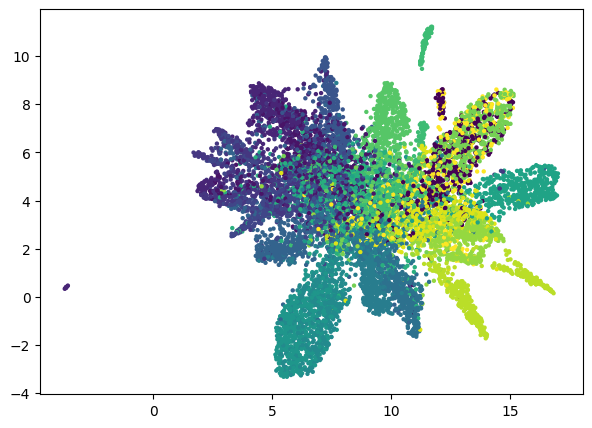

In [17]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],
c = data['category'],
s = 10, # size
edgecolor='none'
)
plt.show()

In [18]:
from gensim.models import CoherenceModel

In [23]:
topic_word_matrix = pd.DataFrame(svd.components_, columns=vectorizer.get_feature_names_out())

In [26]:
import nltk
nltk.download('punkt')
corpus = [nltk.word_tokenize(sentence) for sentence in data['clean_text']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:

def calculate_coherence(topic_word_matrix, coherence_metric='c_v'):
    # Implement coherence calculation logic based on the chosen metric
    if coherence_metric == 'c_v':
        coherence_scores = []
        for topic_index in range(topic_word_matrix.shape[0]):
            topic_words = topic_word_matrix.iloc[topic_index].sort_values(ascending=False).index.tolist()
            top_n = 10  # Adjust as needed
            topic_words = topic_words[:top_n]
            coherence_score = 0
            # Calculate pairwise word co-occurrence scores using the corpus
            for i in range(top_n):
                for j in range(i + 1, top_n):
                    word1 = topic_words[i]
                    word2 = topic_words[j]
                    co_occurrence_score = calculate_co_occurrence_corpus(word1, word2, corpus)  # Assuming a pre-processed corpus
                    coherence_score += co_occurrence_score
            coherence_scores.append(coherence_score)
        return np.mean(coherence_scores)
    else:
        # Implement logic for other coherence metrics as needed
        pass

# Define the corpus-based co-occurrence calculation function (replace with your actual corpus)
def calculate_co_occurrence_corpus(word1, word2, corpus):
    co_occurrence_count = 0
    for document in corpus:
        if word1 in document and word2 in document:
            co_occurrence_count += 1
    return co_occurrence_count


In [28]:
coherence_metric = 'c_v'
coherence_score = calculate_coherence(topic_word_matrix)
print("\nCoherence (", coherence_metric, ") Score:",coherence_score)


Coherence ( c_v ) Score: 11786.55


In [29]:
import numpy as np

def calculate_topic_diversity(topic_word_matrix):
    num_topics = topic_word_matrix.shape[0]
    topic_distributions = topic_word_matrix.div(topic_word_matrix.sum(axis=1), axis=0)  # Normalize word probabilities within topics

    diversity_scores = []
    for i in range(num_topics):
        for j in range(i + 1, num_topics):
            topic_i_distribution = topic_distributions.iloc[i]
            topic_j_distribution = topic_distributions.iloc[j]
            kl_divergence = np.sum(topic_i_distribution * np.log2(topic_i_distribution / topic_j_distribution))
            diversity_scores.append(kl_divergence)

    mean_diversity = np.mean(diversity_scores)
    return mean_diversity


In [30]:
topic_diversity = calculate_topic_diversity(topic_word_matrix)
print("\nTopic Diversity (KL Divergence):", topic_diversity)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)



Topic Diversity (KL Divergence): 1.5492829663623697


In [31]:
def calculate_topic_exclusivity(topic_word_matrix, top_n_words=10):
    num_topics = topic_word_matrix.shape[0]
    exclusivity_scores = []

    for topic_index in range(num_topics):
        topic_words = topic_word_matrix.iloc[topic_index].sort_values(ascending=False).index.tolist()
        top_words = topic_words[:top_n_words]

        exclusivity_score = 0
        for word in top_words:
            word_probabilities = topic_word_matrix[word]
            word_entropy = -np.sum(word_probabilities * np.log2(word_probabilities))
            exclusivity_score += word_entropy

        exclusivity_scores.append(exclusivity_score)

    mean_exclusivity = np.mean(exclusivity_scores)
    return mean_exclusivity


In [32]:
topic_exclusivity = calculate_topic_exclusivity(topic_word_matrix)
print("\nTopic Exclusivity:", topic_exclusivity)



Topic Exclusivity: 22.355693048103998


In [35]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Load the test data
# test_data = pd.read_csv("test_no_simplify.csv")

# # Create a TF-IDF matrix for the test data using the same vocabulary as the training data
# test_vectorizer = TfidfVectorizer(vocabulary=vectorizer.vocabulary_)
# test_tf_idf_matrix = test_vectorizer.fit_transform(test_data["clean_text"].astype(str).tolist())

In [1]:
# # Reconstruct the document-topic matrix (using the full SVD components)
# doc_topic_matrix = test_tf_idf_matrix @ svd.components_

# # Calculate log-likelihood
# log_likelihood = np.sum(test_tf_idf_matrix * np.log(doc_topic_matrix + 1e-9))  # Add a small value to prevent log(0)
